# Get a generalized prediction. Set a benckmark for yourself.
# make a good estimatation of time for improvement.

In [208]:
# import all

from sklearn.ensemble import RandomForestRegressor

# error metric c-stat (aka ROC/AUC)

from sklearn.metrics import roc_auc_score

# pandas efficient data structure.

import pandas as pd

# import numpy as np

# import data, pop out training y

train_x = pd.read_csv("train.csv")

train_y = train_x.pop("Survived")

In [209]:
# Data preview
train_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [210]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [211]:
# Impute missing with mean
train_x['Age'].fillna(train_x['Age'].mean(), inplace=True)

In [212]:
# Get only the numeric variables, do not omit PassengerId, it may related with ticket sold order
numeric_variables = list(train_x.dtypes[train_x.dtypes != "object"].index)
numeric_variables

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [213]:
train_x[numeric_variables][0:10]

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.000000,1,0,7.2500
1,2,1,38.000000,1,0,71.2833
2,3,3,26.000000,0,0,7.9250
3,4,1,35.000000,1,0,53.1000
4,5,3,35.000000,0,0,8.0500
5,6,3,29.699118,0,0,8.4583
6,7,1,54.000000,0,0,51.8625
7,8,3,2.000000,3,1,21.0750
8,9,3,27.000000,0,2,11.1333
9,10,2,14.000000,1,0,30.0708


In [214]:
# Random forrest generalized trial, random_state to be able to replicate these results
model_bm = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

model_bm.fit(train_x[numeric_variables],train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [215]:
# use out-of-bag samples to estimate generalization error, have out of bag predications
y_oob = model_bm.oob_prediction_
print("c-stat result: ",roc_auc_score(train_y,y_oob))

c-stat result:  0.738634305862


# Finish benchmark, state tuning from model_bm to model

In [216]:
# extract and doing statistics for left object variables, improvement for the dataset
def describe_object(X):
    # return object variables only
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [217]:
describe_object(train_x)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Frauenthal, Dr. Henry William",male,1601,B96 B98,S
freq,1,577,7,4,644


In [218]:
# Drop irrelavant columns maybe
train_x.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

In [219]:
# standardize other variables into columns of number, flatten to 0 and 1
# (1) Transform: Cabin with first letter as important standard, if NAN return None
def std_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"
train_x['Cabin']=train_x.Cabin.apply(std_cabin)

In [220]:
# (2) Visualize: use seaborn to visualize categorical variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

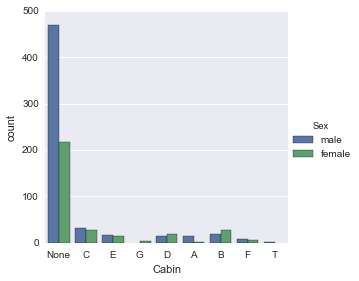

In [221]:
sns.factorplot('Cabin',data=train_x, hue='Sex',kind="count") 

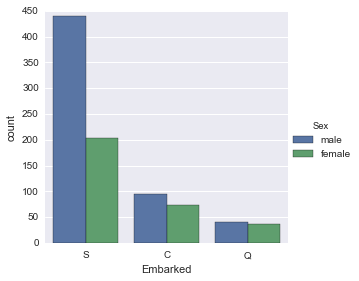

In [222]:
sns.factorplot('Embarked',data=train_x, hue='Sex',kind="count") 

In [223]:
# (3) Flatten categorical parameters, assign 0 or 1 is better than number due to weight is unknown

categorical_x = ['Sex','Cabin','Embarked']

for x in categorical_x:
    train_x[x].fillna("Missing", inplace=True) # Missing is also maybe a option for categorize
    dummies = pd.get_dummies(train_x[x], prefix=x) # create dummies array
    train_x = pd.concat([train_x, dummies], axis=1)
    train_x.drop([x],axis=1, inplace=True)
    

In [224]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 20 columns):
Pclass              891 non-null int64
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
Sex_female          891 non-null float64
Sex_male            891 non-null float64
Cabin_A             891 non-null float64
Cabin_B             891 non-null float64
Cabin_C             891 non-null float64
Cabin_D             891 non-null float64
Cabin_E             891 non-null float64
Cabin_F             891 non-null float64
Cabin_G             891 non-null float64
Cabin_None          891 non-null float64
Cabin_T             891 non-null float64
Embarked_C          891 non-null float64
Embarked_Missing    891 non-null float64
Embarked_Q          891 non-null float64
Embarked_S          891 non-null float64
dtypes: float64(17), int64(3)
memory usage: 146.2 KB


#Finish optimize all data, start building model and tuning parameters

In [225]:
# build typical model model_tp
model_tp = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
model_tp.fit(train_x, train_y)
print("C-stat result: ", roc_auc_score(train_y, model_tp.oob_prediction_))

C-stat result:  0.864772739377


### Get ranking of importance for all variables

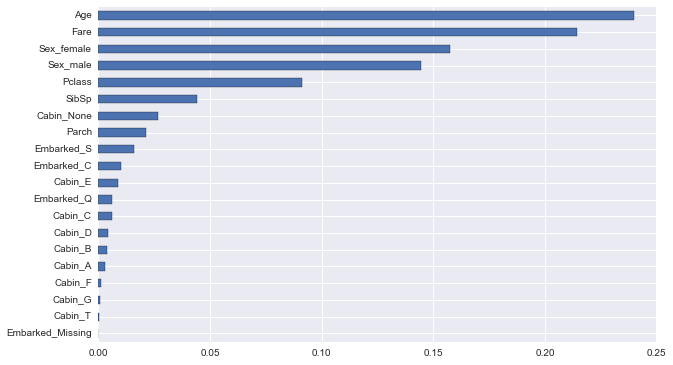

In [226]:
# Get ranking of importance for all variables
# (1) show result
feature_importances = pd.Series(model_tp.feature_importances_, index= train_x.columns)
feature_importances.sort()
feature_importances.plot(kind='barh',figsize=(10,6))

In [227]:
# show variable aggregations
def variable_agg(model, feature_names, aggregations=None):
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    if aggregations:
        for col_name in aggregations:
            sum_value= sum(x for i,x in feature_dict.items() if col_name in i)
            
            keys_remove = [i for i in feature_dict.keys() if col_name in i]
            for i in keys_remove:
                feature_dict.pop(i)
                
            feature_dict[col_name] = sum_value
    #print(feature_dict.values())     
    results = pd.Series(list(feature_dict.values()), index=feature_dict.keys())
    results.sort()
    return results

In [228]:
result_agg=variable_agg(model_tp, train_x.columns,categorical_x)

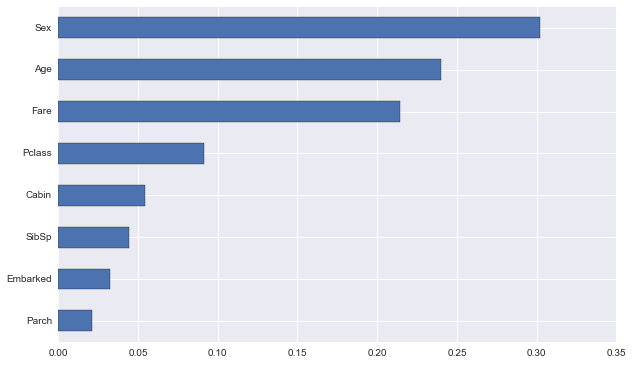

In [229]:
result_agg.plot(kind='barh',figsize=(10,6))

#### Get the importance of varabiles, run EDA to find most important, if just want to predict, select only the important, accuracy will improve and run faster to train

##Parameter tuning

####(1) timeit for n_jobs  %% should be 1st line

In [230]:
%%timeit

model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=1, random_state=42)
model.fit(train_x, train_y)

1 loops, best of 3: 324 ms per loop


In [231]:
%%timeit

model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(train_x, train_y)

1 loops, best of 3: 236 ms per loop


####(2) n_estimators

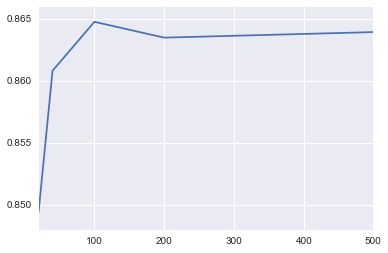

In [372]:
n_estimator_options = [20,40,100,200,500]
results_trees =[]

for trees in n_estimator_options:
    model = RandomForestRegressor(n_estimators=trees, oob_score=True, n_jobs=1, random_state=42)
    model.fit(train_x, train_y)
    roc = roc_auc_score(train_y, model.oob_prediction_)
    results_trees.append(roc)
    
pd.Series(results_trees,n_estimator_options).plot() # results hover around the max

#### (3) max_features

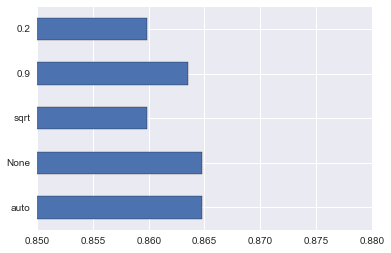

In [233]:
result_feature =[]

max_features_options = ["auto", None, "sqrt", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, n_jobs=1, random_state=42, max_features=max_features)
    model.fit(train_x, train_y)
    roc = roc_auc_score(train_y, model.oob_prediction_)
    result_feature.append(roc)
    
pd.Series(result_feature,max_features_options).plot(kind='barh', xlim=(0.85, 0.88)) # results close auto best

#### (4) min_samples_leaf

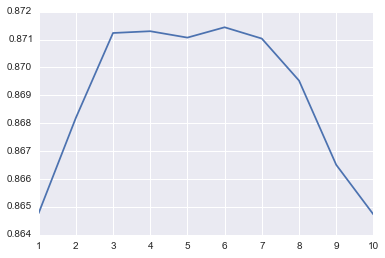

In [234]:
result_leaf = []

min_samples_leaf_options = [1,2,3,4,5, 6,7,8,9,10]

for min_samples_leaf in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=100, oob_score=True, 
                                  n_jobs=1, random_state=42, max_features='auto', 
                                 min_samples_leaf=min_samples_leaf)
    model.fit(train_x, train_y)
    roc = roc_auc_score(train_y, model.oob_prediction_)
    result_leaf.append(roc)

pd.Series(result_leaf,min_samples_leaf_options).plot() 

##Automatic tuning

In [243]:
'''Parameter_grid = [(100,200),(2,6,8)]

best_roc = float('-inf')

for n_estimators, min_samples_leaf in (100,200),(2,6):
    model = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, 
                                  n_jobs=1, random_state=42, max_features='auto', 
                                 min_samples_leaf=min_samples_leaf)
    model.fit(train_x, train_y)
    roc = roc_auc_score(train_y, model.oob_prediction_)
    if roc > best_roc:
        best_roc = roc

print(best_roc)'''

"Parameter_grid = [(100,200),(2,6,8)]\n\nbest_roc = float('-inf')\n\nfor n_estimators, min_samples_leaf in (100,200),(2,6):\n    model = RandomForestRegressor(n_estimators=n_estimators, oob_score=True, \n                                  n_jobs=1, random_state=42, max_features='auto', \n                                 min_samples_leaf=min_samples_leaf)\n    model.fit(train_x, train_y)\n    roc = roc_auc_score(train_y, model.oob_prediction_)\n    if roc > best_roc:\n        best_roc = roc\n\nprint(best_roc)"

#Final result, add Feature engineering and data improvement

In [235]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 20 columns):
Pclass              891 non-null int64
Age                 891 non-null float64
SibSp               891 non-null int64
Parch               891 non-null int64
Fare                891 non-null float64
Sex_female          891 non-null float64
Sex_male            891 non-null float64
Cabin_A             891 non-null float64
Cabin_B             891 non-null float64
Cabin_C             891 non-null float64
Cabin_D             891 non-null float64
Cabin_E             891 non-null float64
Cabin_F             891 non-null float64
Cabin_G             891 non-null float64
Cabin_None          891 non-null float64
Cabin_T             891 non-null float64
Embarked_C          891 non-null float64
Embarked_Missing    891 non-null float64
Embarked_Q          891 non-null float64
Embarked_S          891 non-null float64
dtypes: float64(17), int64(3)
memory usage: 146.2 KB


In [247]:
model_final = RandomForestRegressor(n_estimators=100, oob_score=True, 
                                  n_jobs=1, random_state=42, max_features='auto', 
                                 min_samples_leaf=6)
model_final.fit(train_x, train_y)
roc = roc_auc_score(train_y, model_final.oob_prediction_)
print(roc)

0.871438234323


In [349]:
test_x = pd.read_csv("test.csv")
ids = test_x['PassengerId']

In [350]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [351]:
#Flatten categorical parameters, assign 0 or 1 is better than number due to weight is unknown
test_x['Age'].fillna(test_x['Age'].mean(), inplace=True)

test_x['Fare'].fillna(test_x['Fare'].mean(), inplace=True)

test_x.drop(['Name','Ticket','PassengerId'], axis=1, inplace=True)

test_x['Cabin']=test_x.Cabin.apply(std_cabin)

categorical_x = ['Sex','Cabin','Embarked']

for x in categorical_x:
    test_x[x].fillna("Missing", inplace=True) # Missing is also maybe a option for categorize
    dummies = pd.get_dummies(test_x[x], prefix=x) # create dummies array
    test_x = pd.concat([test_x, dummies], axis=1)
    test_x.drop([x],axis=1, inplace=True)

In [352]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 18 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null float64
Sex_male      418 non-null float64
Cabin_A       418 non-null float64
Cabin_B       418 non-null float64
Cabin_C       418 non-null float64
Cabin_D       418 non-null float64
Cabin_E       418 non-null float64
Cabin_F       418 non-null float64
Cabin_G       418 non-null float64
Cabin_None    418 non-null float64
Embarked_C    418 non-null float64
Embarked_Q    418 non-null float64
Embarked_S    418 non-null float64
dtypes: float64(15), int64(3)
memory usage: 62.0 KB


In [353]:
# Missing Carin_T and Embark_Missing

In [354]:
test_x['Carbin_T']=0
test_x['Embarked_Missing']=0

In [355]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 20 columns):
Pclass              418 non-null int64
Age                 418 non-null float64
SibSp               418 non-null int64
Parch               418 non-null int64
Fare                418 non-null float64
Sex_female          418 non-null float64
Sex_male            418 non-null float64
Cabin_A             418 non-null float64
Cabin_B             418 non-null float64
Cabin_C             418 non-null float64
Cabin_D             418 non-null float64
Cabin_E             418 non-null float64
Cabin_F             418 non-null float64
Cabin_G             418 non-null float64
Cabin_None          418 non-null float64
Embarked_C          418 non-null float64
Embarked_Q          418 non-null float64
Embarked_S          418 non-null float64
Carbin_T            418 non-null int64
Embarked_Missing    418 non-null int64
dtypes: float64(15), int64(5)
memory usage: 68.6 KB


In [369]:
predict_results = model_final.predict(test_x)
predict_map =[]
for result in predict_results:
    if result > 0.5: predict_map.append(1)
    else: predict_map.append(0)

In [370]:
'''import csv as csv
rows = zip(ids,predict_results)
csvfile = "forestoutput1.csv"

f = open(csvfile, 'w+')
try:
    writer = csv.writer(f,lineterminator='\n')
    writer.writerow( ('PassengerId', 'Survived') )
    for row in rows:
        writer.writerow( row )
finally:
    f.close()'''

submission = pd.DataFrame({ 'PassengerId': ids,
                            'Survived': predict_map })
submission.to_csv("submission.csv", index=False)



[]